In [246]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [247]:
window = 5
radius = -(-window//2)

In [248]:
def rotate_point(origin, point, angle):

    ox, oy = origin
    px, py = point

    qx = ox + np.cos(angle) * (px - ox) - np.sin(angle) * (py - oy)
    qy = oy + np.sin(angle) * (px - ox) + np.cos(angle) * (py - oy)

    return int(qx), int(qy)

# Node detection kernel, generates feature to detect inside sliding window
def node_detect(win, feature, angle=0, thickness=1):

    # Check that feature is correctly specified
    assert feature in ("cross", "tee", "elbow", "end"), "Feature must be one of 'cross', 'tee', 'elbow', or 'end'."

    # Convert angle to radians
    angle = np.deg2rad(angle)
    
    # Create kernel matrix 
    kernel = np.zeros((win, win), np.uint8)

    center = win // 2
    origin = (center, center)

    # Top
    if feature in ("cross", "tee", "end"):
        endpoint = rotate_point(origin, (center, 0), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Bottom
    if feature == "cross":
        endpoint = rotate_point(origin, (center, win), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Left 
    if feature in ("cross", "tee"):
        endpoint = rotate_point(origin, (0, center), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)
    # Right 
    if feature in ("cross", "tee", "elbow"):
        endpoint = rotate_point(origin, (win, center), angle)
        cv2.line(kernel, origin, endpoint, (1, 1, 1), thickness)

    return kernel

In [249]:
kernel = node_detect(window, feature="tee", angle=35)
kernel2 = node_detect(window, feature="tee", angle=35, thickness=2)

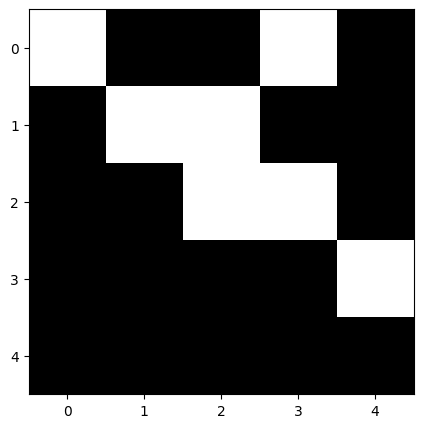

In [250]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(kernel, cmap='gray')

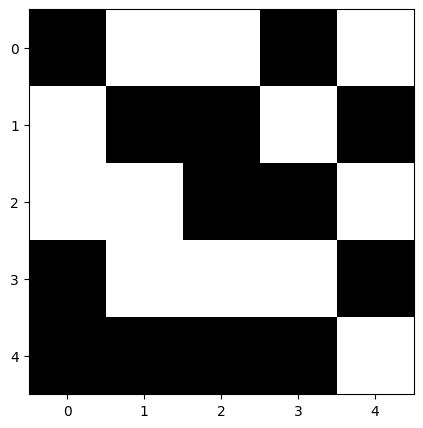

In [251]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(kernel-kernel2, cmap='gray')

In [264]:
kernel-kernel2

array([[  0, 255, 255,   0, 255],
       [255,   0,   0, 255,   0],
       [255, 255,   0,   0, 255],
       [  0, 255, 255, 255,   0],
       [  0,   0,   0,   0, 255]], dtype=uint8)

In [253]:

np.array_equal(kernel*kernel2, kernel)

True

In [254]:
np.max(kernel)

1